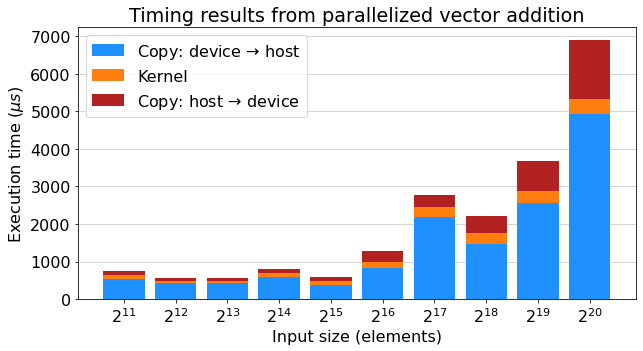

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 16})
from math import log
import pandas as pd


# time is in millionths of seconds (microseconds)

data = pd.read_csv("ex1.csv", header=None)

sizes = data[0]
sizes = [
    f"$2^{{{str(int(log(s, 2)))}}}$" for s in sizes
]

copy_hosttodevice = data[1]
kernel= data[2]
copy_devicetohost = data[3]

plt.grid(axis='y', color="#cccccc")

plt.bar(sizes, copy_hosttodevice, color='dodgerblue', label="Copy: device $\\to$ host", zorder=3)
plt.bar(sizes, kernel, bottom=copy_hosttodevice, color='tab:orange', label="Kernel", zorder=3)

bottom = [x + y for (x, y) in zip(copy_hosttodevice, kernel)]
plt.bar(sizes, copy_devicetohost, bottom=bottom, color='firebrick', label="Copy: host $\\to$ device", zorder=3)

plt.legend(loc="upper left")

plt.xlabel("Input size (elements)")
plt.ylabel("Execution time ($\\mu s$)")
plt.title(f"Timing results from parallelized vector addition")

plt.show()